In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Set seaborn style
sns.set() 

# Ejemplo de propagación de incertezas en la división de dos variables aleatorias con distribución normal

Asumimos que tenemos dos variables aletorias $X$ e $Y$ independientes con distribución normal.

Se tiene que $\mu_X$ y $\sigma_X$ son la esperanza y el desvío estándar de $X$, y análogamente $\mu_Y$ e $\sigma_Y$ lo son para $Y$. 

Se define una nueva variable aletaroia como:

\begin{equation}
Z = \frac{X}{Y}
\end{equation}

y se desea encontrar cuánto es el desvío estándar de $Z$, $\sigma_Z$.

Aplicando la fórmula para propagar incertezas se obtiene:

\begin{equation}
\sigma_Z = \mu_Z \sqrt{ \left(\frac{\sigma_X}{\mu_X}\right)^2 + \left(\frac{\sigma_Y}{\mu_Y}\right)^2}
\end{equation}

## Simulación para verificar el resultado (Monte-Carlo)

El resultado teórico puede ser validado mediante una simulaicón de Monte-Carlo. Se muestrean pares de variables aleatorias normales e independientes, se las divide y se construye el histograma con la distribución de $Z$. De esta manera se obtiene la distribución de probabilidad de la variable $Z$.

En particular, sólo interesa su desvío estándar, pero es importante recalcar que por este método se obtiene la máxima información posible sobre $Z$ (y no sus primeros momentos).

In [2]:
# Función para graficar hisogramas junto con la distribución normal asociada
def plot_histogram_with_gaussian(data, mean, std, range_vals, color, label):
    """
    Plots a histogram of the data and overlays a Gaussian fit.

    Parameters:
        data (np.array): The data to plot.
        mean (float): The mean of the Gaussian fit.
        std (float): The standard deviation of the Gaussian fit.
        range_vals (list): The range for the histogram and Gaussian fit.
        color (str): The color of the histogram.
        label (str): The label for the histogram.
        title (str): The title of the plot.
        ax (matplotlib.axes.Axes): The axis to plot on.
    """
    fig, ax = plt.subplots()

    mu_data, sig_data = np.mean(data), np.std(data)


    # Plot histogram
    counts, bins, _ = ax.hist(data, bins=50, range=range_vals, density=True,
                              alpha=0.6, color=color, label=label)

    # Plot Gaussian fit
    x = np.linspace(*range_vals, 1000)
    gaussian_fit = norm.pdf(x, mean, std)
    ax.plot(x, gaussian_fit, 'r-', label='Distribución normal')

    # Add title and labels
    title = f'$\hat\mu$ = {mu_data:.2f}      $\hat\sigma$ = {sig_data:.2f}'
    ax.set_title(title)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend(loc='best')   
    return (fig, ax)

In [3]:
# Parámetros para la simulación
mu_x = 40  # Mean for the first normal variable
sig_x = 5  # Standard deviation for the first normal variable
mu_y = 4  # Mean for the second normal variable
sig_y = 1  # Standard deviation for the second normal variable
num_samples = 100000  # Number of samples to generate     

# Valores teóricos esperados para la variable Z
mu_z_teo = mu_x / mu_y  # Aproximación a primer orden
std_z_teo = mu_z_teo * np.sqrt( (sig_x / mu_x)**2 + (sig_y / mu_y)**2)  # Aproximación a primer orden
print(f"Esperanza teórica de Z: {mu_z_teo}")
print(f"Desvío estándar de Z: {std_z_teo}")
                                                             

Esperanza teórica de Z: 10.0
Desvío estándar de Z: 2.7950849718747373


In [4]:
# Se simulan las variables con distribución normal
x = np.random.normal(mu_x, sig_x, num_samples)
y = np.random.normal(mu_y, sig_y, num_samples)

# Se realiza la suma
z = x / y

In [5]:
# Se definen límites para los gráficos
lim = 5  # Number of standard deviations to plot
lim_bin_x = [mu_x - lim * sig_x, mu_x + lim * sig_x]  # Range for normal_var1
lim_bin_y = [mu_y - lim * sig_y, mu_y + lim * sig_y]  # Range for normal_var2
lim_bin_z = [mu_z_teo - lim * std_z_teo, mu_z_teo + lim * std_z_teo]  # Range for sum_vars

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\hat\\mu$ = 40.00      $\\hat\\sigma$ = 5.00'}, xlabel='Valor', ylabel='Densidad de probabilidad'>)

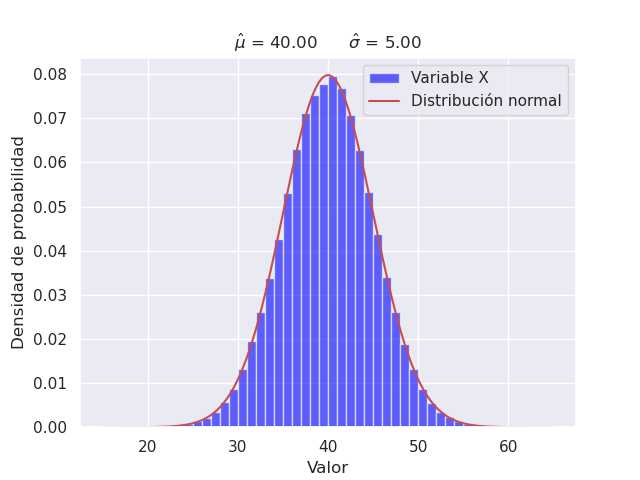

In [6]:
# Calculo el promedio y desvío de los valores simulados para X
mu_x_est, sig_x_est = np.mean(x), np.std(x)

# Plot histograms and Gaussian fits
plot_histogram_with_gaussian(x, mu_x_est, sig_x_est, lim_bin_x, 'blue',
                             'Variable X')

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\hat\\mu$ = 4.00      $\\hat\\sigma$ = 1.00'}, xlabel='Valor', ylabel='Densidad de probabilidad'>)

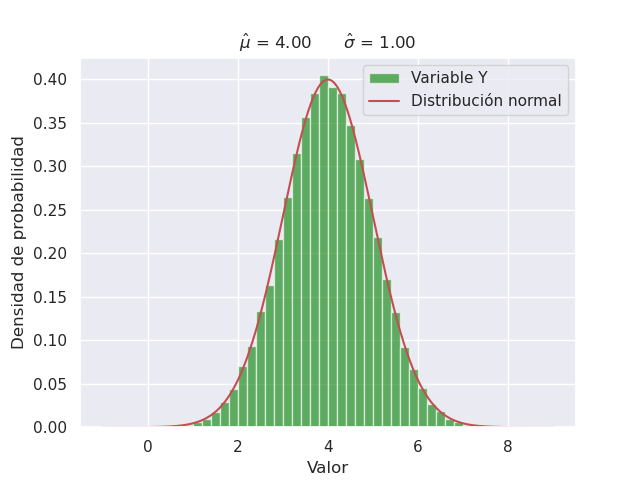

In [7]:
# Calculo el promedio y desvío de los valores simulados para Y
mu_y_est, sig_y_est = np.mean(y), np.std(y)

plot_histogram_with_gaussian(y, mu_y_est, sig_y_est, lim_bin_y, 'green',
                             'Variable Y')

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\hat\\mu$ = 10.79      $\\hat\\sigma$ = 8.14'}, xlabel='Valor', ylabel='Densidad de probabilidad'>)

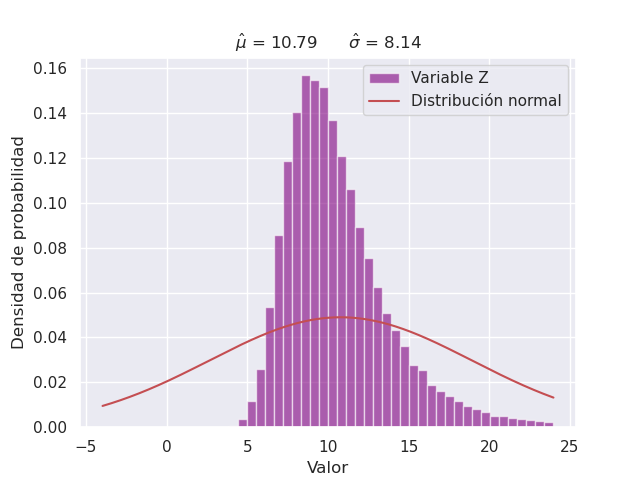

In [8]:
# Calculo el promedio y desvío de los valores simulados para Z
mu_z_est, sig_z_est = np.mean(z), np.std(z)

plot_histogram_with_gaussian(z, mu_z_est, sig_z_est, lim_bin_z, 'purple', 'Variable Z')

En este caso la distribución clarmante no es Normal. El cociente de dos variables aleatorias da como resultado una variable aleatoria con distribución de Cauchy. La distribución de Cauchy no tiene definida ni su esperanza ni su desvío estándar.

En este ejemplo vemos que la aproximación a primer orden que utiliza la fórmula de propagación de incertezas no resulta válida.